## **🛒 Market Basket Analysis**

### **1️⃣ Introduction**

**Objective**: Identify products that are frequently bought together.

**Application**:
- **Retail**: Determine product bundling strategies. For example, if bread and butter have a high positive correlation, stores can place these items near each other or offer bundle deals.
- **E-commerce**: Enhance recommendation systems by suggesting items that are often purchased together.

### **2️⃣ Calculations**

Import Pandas, Matplotlib and Seaborn:

In [ ]:
# YOUR CODE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data about transactions by the following link:\
https://raw.githubusercontent.com/sca-programming-school/datasets/main/transactions.csv

In [ ]:
# YOUR CODE
df = pd.read_csv('https://raw.githubusercontent.com/sca-programming-school/datasets/main/transactions.csv')

Let's take a look at the given data. Output the first 5 rows:

In [ ]:
# YOUR CODE
df.head()

,TransactionID,Product,Amount
0,1,Apple,2
1,1,Eggs,1
2,1,Milk,2
3,2,Jam,8
4,2,Bread,3


We neeed to make a pivot table that has:
* transactions as rows
* products as columns
* amount as values

In [ ]:
# YOUR CODE
df_pivot = df.pivot_table(index = 'TransactionID',
                          columns = 'Product',
                          values = 'Amount',
                          aggfunc = 'sum')

In [ ]:
# YOUR CODE
df_pivot.head()

Product,Apple,Banana,Bread,Butter,Cheese,Eggs,Jam,Milk
TransactionID,,,,,,,,
1,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0
2,NaN,4.0,3.0,3.0,6.0,8.0,8.0,NaN
3,NaN,3.0,NaN,NaN,9.0,NaN,1.0,NaN
4,2.0,NaN,8.0,6.0,NaN,7.0,NaN,9.0
5,5.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0


In [ ]:
df_pivot.fillna(0,inplace=True) # Fill NA value by 0 (Becasue the customer didn't buy this product)
df_pivot.head()

Product,Apple,Banana,Bread,Butter,Cheese,Eggs,Jam,Milk
TransactionID,,,,,,,,
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0.0,4.0,3.0,3.0,6.0,8.0,8.0,0.0
3,0.0,3.0,0.0,0.0,9.0,0.0,1.0,0.0
4,2.0,0.0,8.0,6.0,0.0,7.0,0.0,9.0
5,5.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0


Now, we can calculate a correlation matrix based on the pivot table:

In [ ]:
# YOUR CODE
df_pivot_corr = df_pivot.corr()

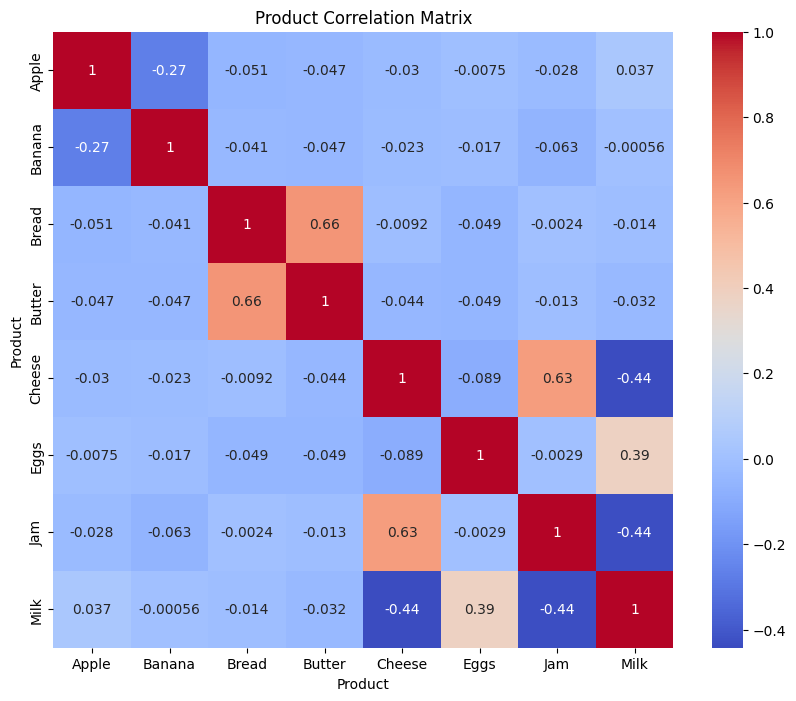

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot_corr, annot=True, cmap='coolwarm')
plt.title('Product Correlation Matrix')

plt.show()

### **3️⃣ Insights & Conclusions**

Firstly, I will focus on those who have strong positive correlation. Specifically as follows:

**1. Bread and Butter**
- Correlation: *0.66*
- Insight: There is a strong positive correlation between bread and butter, meaning that the customers are likely to buy both products together. Obviously, a toast cannot be complete without one of these two ingredients.

**2. Cheese and Jam**
- Correlation: *0.63*
- Insight: Same as the first pair, there is also a strong positive relationship between cheese and jam. This a common pair of products.

**3. Eggs and Milk**
- Correlation: *0.39*
- Insight: Another combo package, we can see these two ingredients appear a lot in cooking and baking recipes.

**Actionable insights**
- Suggest discounted combo packages or bundle deals for these product pairs to increase sales. For instance:
  - When a customer purchases Bread, we can recommend them to buy Butter at a discount.
  - When a customer buys Cheese, we can suggest Jam as an additional item.
- For a supermarket or retail store, we can place these products close together to increase the likelihood of customer buying both.

Secondly, I will focus on the products that have strong negative correlation:

**1. Cheese & Milk and Jam & Milk**
- Correlation: *- 0.44*
- Insight: They have strong negative relationship, meaning that when customer buys Cheese or Jam, they are less likely to buy Milk. They may choose one of the two instead of buying both.

**2. Apple & Banana**
- Correlation: *- 0.27*
- Insight: They have a moderate negative correlation, meaning that customers are likely to buy just one fruit and not both.

**Acionable insights**
- For online shopping, we can suggest alternative product when a customer does not choose a certain product (e.g: "Not buying Cheese ? Try Milk at a discount !").
- For retail stores, we can place these products separately to reduce direct competition and increase the chance of selling both.
- If we still want to sell these combos, for example Apple & Banana, we may create combo promotions to encourage customers to purchase.